# Light Exploratory Data Analysis

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
basics = pd.read_csv('Data/basics.csv.gz', low_memory = False)

In [55]:
basics.loc[(basics['startYear'] == 2000) | (basics['startYear'] == 2001)].shape

(2918, 9)

In [57]:
df = pd.read_csv('Data/tmdb_2000_2001_results_combined.csv.gz', low_memory = False)

In [58]:
df.shape

(2920, 26)

## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [59]:
# movies with valid financial information
df_old = df.copy()
df = df.loc[(df['budget'] > 0) | (df['revenue'] > 0)]
df.shape[0]

614

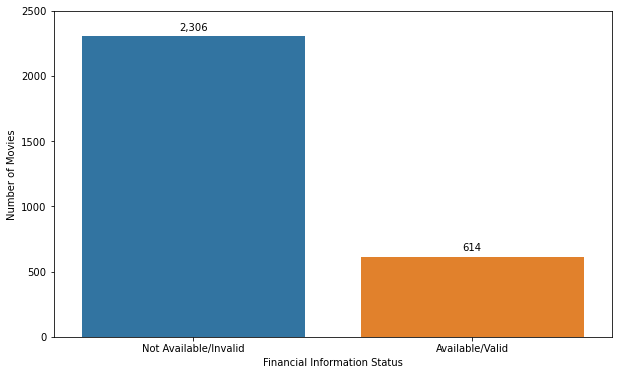

In [60]:
ax = sns.barplot(x = ['Not Available/Invalid', 'Available/Valid'],
           y = [df_old.shape[0]-df.shape[0],df.shape[0]])
ax.set(xlabel="Financial Information Status", ylabel = "Number of Movies")

## the following code used to annotate barplot was adapted from
## https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0, 2500);

In [16]:
df.columns

Index(['imdb_id', 'adult', 'backdrop_path', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'certification'],
      dtype='object')

## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [17]:
df['certification'].value_counts().index

Index(['R', 'PG-13', 'NR', 'PG', 'G', 'NC-17', 'R ', 'PG-13 ', 'Unrated'], dtype='object')

In [20]:
# remove spaces to maintain consistent categorization 
df['certification'] = df['certification'].str.strip()

In [21]:
df['certification'].value_counts().index

Index(['R', 'PG-13', 'NR', 'PG', 'G', 'NC-17', 'Unrated'], dtype='object')

(0.0, 240.0)

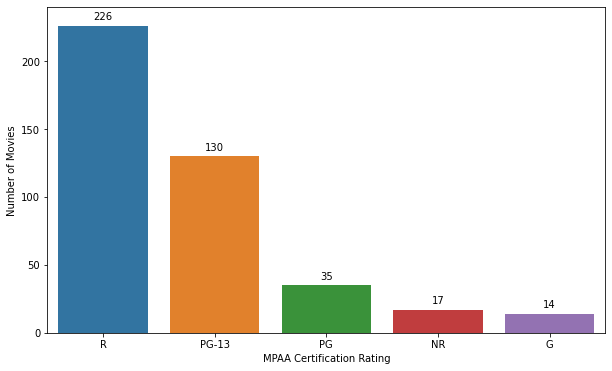

In [64]:
ax = sns.countplot(data = df, x = 'certification', order = df['certification'].value_counts().index)
ax.set(xlabel="MPAA Certification Rating", ylabel = "Number of Movies")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylim(0, 240)

## What is the average revenue per certification category?

In [26]:
to_plot_revenue = df.groupby('certification')['revenue'].mean()
to_plot_revenue

certification
G          9.362867e+07
NC-17      5.069658e+06
NR         6.219294e+06
PG         1.265423e+08
PG-13      1.182829e+08
R          3.130826e+07
Unrated    0.000000e+00
Name: revenue, dtype: float64

In [37]:
default_params = plt.rcParams.copy()
plt.rcParams.update({'figure.figsize':[10,6]})

(0.0, 135000000.0)

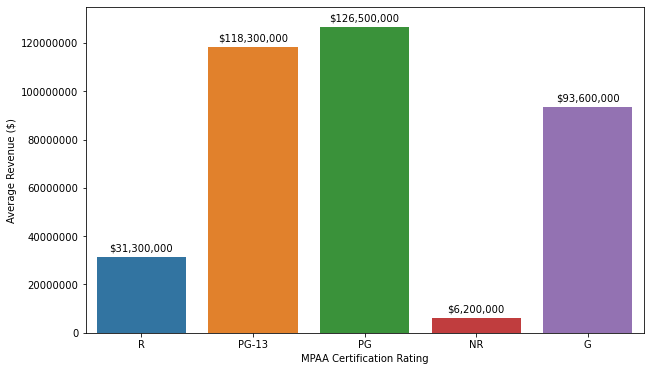

In [68]:
ax = sns.barplot(x = to_plot_revenue.index, y = to_plot_revenue.values, order = df['certification'].value_counts().index)
ax.set(xlabel="MPAA Certification Rating", ylabel = "Average Revenue ($)")
for p in ax.patches:
    ax.annotate('${:,.0f}'.format(round(p.get_height(), -5)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 1.35e8)

## What is the average budget per certification category?

In [69]:
to_plot_budget = df.groupby('certification')['budget'].mean()
to_plot_budget

certification
G        4.085714e+07
NR       6.388241e+06
PG       4.497857e+07
PG-13    4.348391e+07
R        2.028827e+07
Name: budget, dtype: float64

(0.0, 48000000.0)

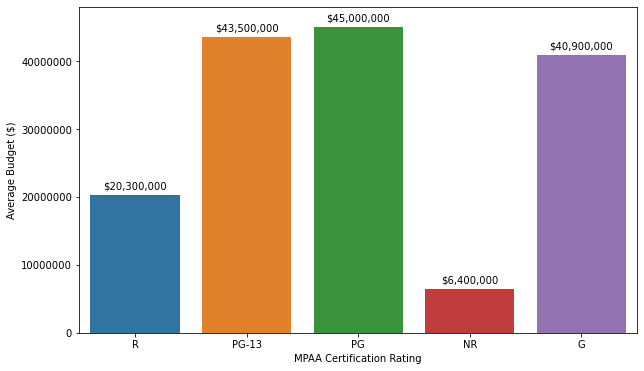

In [75]:
ax = sns.barplot(x = to_plot_budget.index, y = to_plot_budget.values, order = df['certification'].value_counts().index)
ax.set(xlabel="MPAA Certification Rating", ylabel = "Average Budget ($)")
for p in ax.patches:
    ax.annotate('${:,.0f}'.format(round(p.get_height(), -5)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 4.8e7)

In [84]:
sns.set_context("talk")

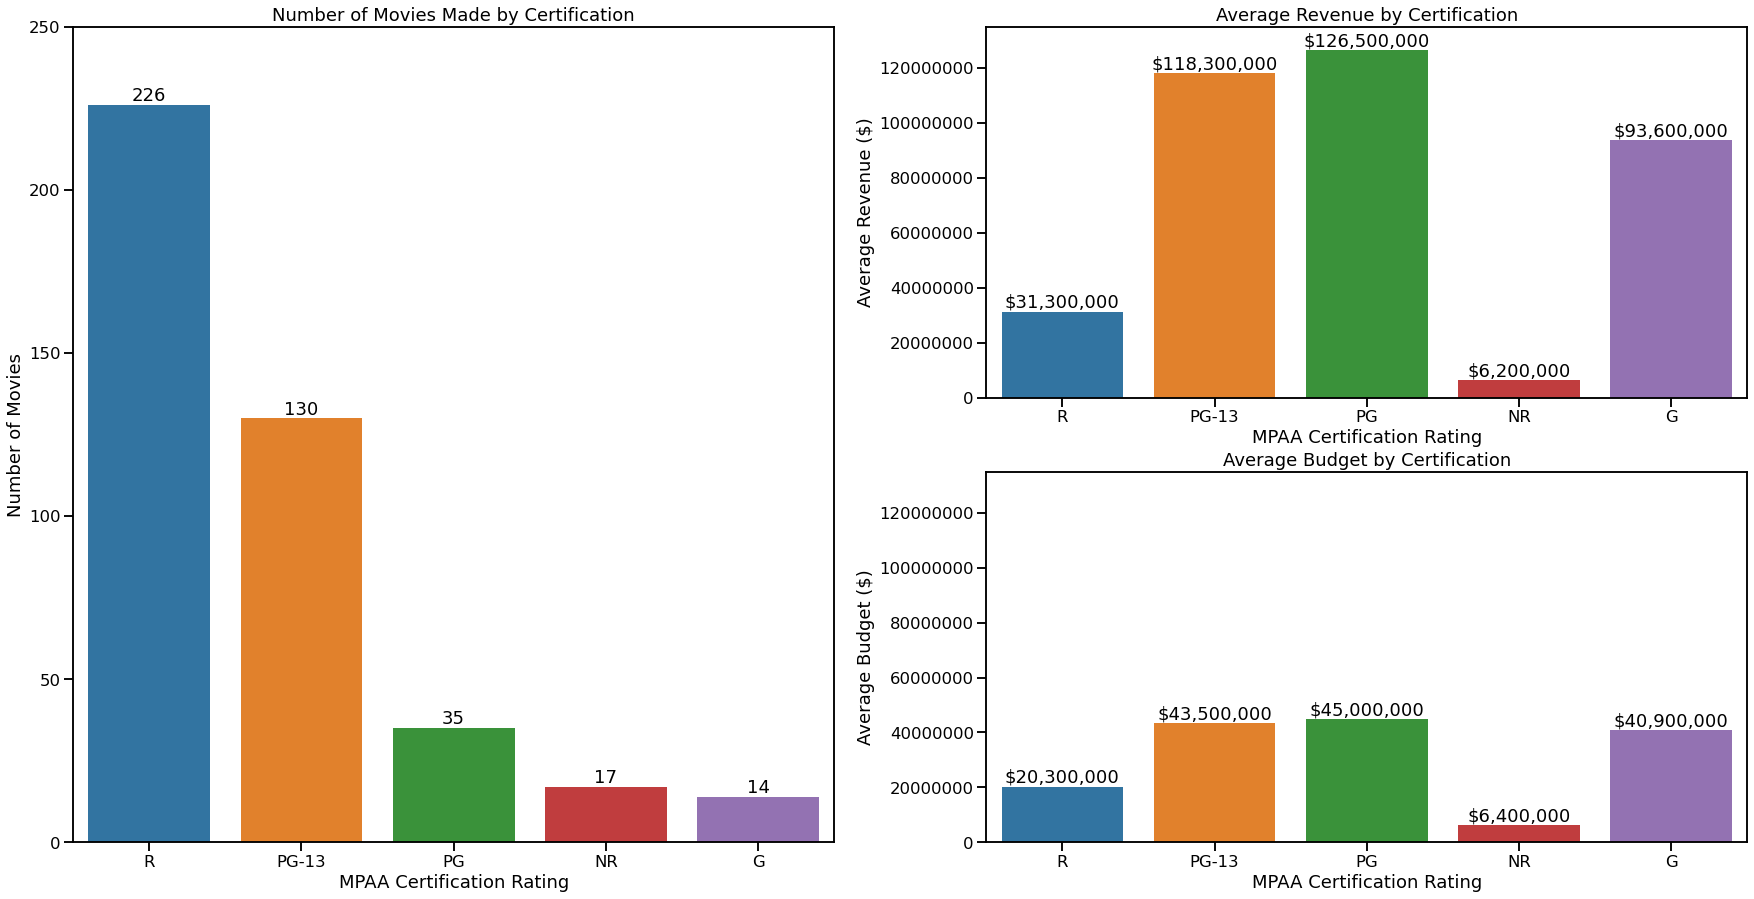

In [88]:
# all requested data on one figure
fig = plt.figure(figsize = (30,15))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4, sharey = ax2)


#number of movies per certification type
sns.countplot(data = df, x = 'certification', order = df['certification'].value_counts().index, ax = ax1)
ax1.set(xlabel="MPAA Certification Rating", ylabel = "Number of Movies", title="Number of Movies Made by Certification")
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax1.set_ylim(0, 250)

# revenue per certification type
sns.barplot(x = to_plot_revenue.index, y = to_plot_revenue.values, order = df['certification'].value_counts().index, ax = ax2)
ax2.set(xlabel="MPAA Certification Rating", ylabel = "Average Revenue ($)", title="Average Revenue by Certification")
for p in ax2.patches:
    ax2.annotate('${:,.0f}'.format(round(p.get_height(), -5)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax2.set_ylim(0, 1.35e8)


sns.barplot(x = to_plot_budget.index, y = to_plot_budget.values, order = df['certification'].value_counts().index, ax = ax3)
ax3.set(xlabel="MPAA Certification Rating", ylabel = "Average Budget ($)", title="Average Budget by Certification")
for p in ax3.patches:
    ax3.annotate('${:,.0f}'.format(round(p.get_height(), -5)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ticklabel_format(style='plain', axis='y')